In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import calendar
from matplotlib import pyplot as plt
import matplotlib.ticker as ptick 
import scipy.stats as stats
import glob

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import seaborn as sns
import japanize_matplotlib


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Mean Absolute Error(MAE)用 
from sklearn.metrics import mean_absolute_error 
# Root Mean Squared Error(RMSE)用 
from sklearn.metrics import mean_squared_error


In [2]:
files = glob.glob('../../../卒論関連書類/データ/king_history/king_history1/*')
version = len(files)-1
df_king =pd.read_csv(f'../../../卒論関連書類/データ/king_history/king_history1/king{version}.csv',converters={'DateTime':pd.to_datetime})

cols =['DateTime', 'intra_volume（MWh/h）',
       'spot_volume(kWh)']
df_select =df_king[cols].dropna()
df_select.loc[:,'intra_volume（MWh/h）'] = df_select['intra_volume（MWh/h）']/2

percent_list=[]
intra_total_mean =[]
years = [2018,2019,2020,2021,2022]
for year in years :
    df = df_select[df_select['DateTime'].dt.year == year]
    percent =round(np.sum(df['intra_volume（MWh/h）']*1000)/(np.sum(df['spot_volume(kWh)']) + np.sum(df['intra_volume（MWh/h）']*1000))*100,1)
    percent_list.append(percent)
    intra_total_mean.append(np.sum(df['intra_volume（MWh/h）']*1000))

years = ['2018', '2019', '2020', '2021', '2022', '2018-2022']

percent_list.append(round(np.sum(df_select['intra_volume（MWh/h）']*1000)/(np.sum(df_select['spot_volume(kWh)']) + np.sum(df_select['intra_volume（MWh/h）']*1000))*100,1))
intra_total_mean.append(np.sum(df_select['intra_volume（MWh/h）']*1000)/len(years))

years_name = np.array(years,dtype='str')

In [48]:
def newdrow2plot(x,y_bar,y_plot):
    plt.rcParams['font.family']='sans-serif'
    plt.rcParams['font.sans-serif']=['TImes New Roman']
    # plt.rcParams['font.japanse']='MS Mincho'
    plt.rcParams['font.size']=16
    x=x
    y1 = y_bar
    y2 = y_plot

    fig = plt.figure(figsize=(8,8))

    ax2 = fig.subplots()
    ax1 = ax2.twinx()
    ax1.set_zorder(2)
    ax2.set_zorder(1)
    ax1.patch.set_alpha(0)
    ax1.set_ylabel('時間前市場の割合(%)',fontname='MS Mincho')
    
    ax1.set_ylim(0,10)
    ax2.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))   # こっちを先に書くこと。
    
    ax2.ticklabel_format(style="sci", axis="y", scilimits=(3,3))   # 10^3単位の指数で表示する
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

    
    ax2.set_ylabel('時間前市場の年間取引量($10^3$MWh)',labelpad=10,fontname = 'MS Mincho')
    # ax2.set_ylim(0,10)

    ax1.plot(x, y2,color ='black'
    ,label='割合',marker='o'
    )
    ax1.legend(bbox_to_anchor=(0, 0.8),loc='lower left',prop={'family':'MS Mincho'})

    ax2.bar(x, y1,color ='grey',label='取引量')
    
    ax2.legend(bbox_to_anchor=(0, 0.9),loc='lower left',prop={'family':'MS Mincho'})
    plt.savefig('../../../卒論関連書類/画像/卒論用画像/時間前市場割合.png',bbox_inches='tight')
    plt.show()

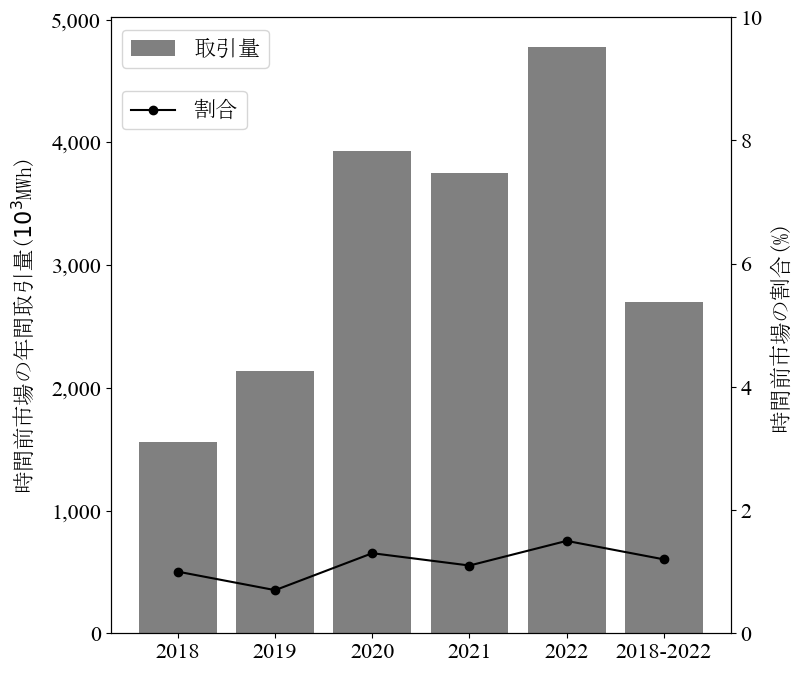

In [49]:

newdrow2plot(years_name,np.array(intra_total_mean)/1000/1000,percent_list)

In [41]:
df_select

,DateTime,intra_volume（MWh/h）,spot_volume(kWh)
0,2018-04-01 00:00:00,29.40,6098500
1,2018-04-01 00:30:00,27.00,6225500
2,2018-04-01 01:00:00,28.65,6356500
3,2018-04-01 01:30:00,31.50,6439500
4,2018-04-01 02:00:00,30.80,6439000
...,...,...,...
84368,2023-01-05 00:30:00,314.85,19865950
84369,2023-01-05 01:00:00,306.20,20127950
84370,2023-01-05 01:30:00,281.25,20384200
84371,2023-01-05 02:00:00,246.15,20624850


In [94]:
df_select

,DateTime,intra_volume（MWh/h）,spot_volume(kWh)
0,2018-04-01 00:00:00,58.8,6098500
1,2018-04-01 00:30:00,54.0,6225500
2,2018-04-01 01:00:00,57.3,6356500
3,2018-04-01 01:30:00,63.0,6439500
4,2018-04-01 02:00:00,61.6,6439000
...,...,...,...
84410,2023-01-05 21:30:00,NaN,22544600
84411,2023-01-05 22:00:00,NaN,22180900
84412,2023-01-05 22:30:00,NaN,22143700
84413,2023-01-05 23:00:00,NaN,22054200


In [6]:
def drow2plot(x,y_bar,y_plot):
    x=x
    y1 = y_bar
    y2 = y_plot

    fig = plt.figure()

    ax1 = fig.subplots()
    ax2 = ax1.twinx()
    ax1.set_zorder(2)
    ax2.set_zorder(1)
    ax1.patch.set_alpha(0)
    ax1.set_ylabel('時\n間\n前\n市\n場\nの\n割\n合\n(%)',rotation =0,loc ='center')
    
    ax1.set_ylim(0,10)
    ax2.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))   # こっちを先に書くこと。
    ax2.ticklabel_format(style="sci", axis="y", scilimits=(3,3))   # 10^3単位の指数で表示する。

    ax2.set_ylabel('\n\n\n\n\n時\n間\n前\n市\n場\nの\n年\n間\n取\n引\n量\n(MWh)',rotation =0,loc ='top',labelpad=10)
    # ax2.set_ylim(0,10)

    ax1.plot(x, y2,color ='black'
    ,label='割合'
    )
    ax1.legend()

    ax2.bar(x, y1,color ='grey',label='取引量')
    # plt.savefig('../../../卒論関連書類/画像/卒論用画像/時間前市場割合.png',bbox_inches='tight')
    ax2.legend(bbox_to_anchor=(0.5, -0.1, 0.5, 1))

    plt.show()

In [101]:
years

['2018', '2019', '2020', '2021', '2022', '2018-2022']

In [102]:
percent_list

[1.0, 0.7, 1.3, 1.1, 1.5, 1.2]

In [103]:
np.array(intra_total_mean)/1000/1000

array([1556.14415   , 2136.80155   , 3927.04255   , 3748.3711    ,
       4781.12155   , 2703.42759167])

In [80]:
intra_total_mean

[3112288300.0,
 4273603100.0,
 7854085100.0,
 7496742200.0,
 9562243100.0,
 5406855183.333333]

In [13]:
df_select

,DateTime,intra_volume（MWh/h）,spot_volume(kWh)
0,2018-04-01 00:00:00,58.8,6098500
1,2018-04-01 00:30:00,54.0,6225500
2,2018-04-01 01:00:00,57.3,6356500
3,2018-04-01 01:30:00,63.0,6439500
4,2018-04-01 02:00:00,61.6,6439000
...,...,...,...
84410,2023-01-05 21:30:00,NaN,22544600
84411,2023-01-05 22:00:00,NaN,22180900
84412,2023-01-05 22:30:00,NaN,22143700
84413,2023-01-05 23:00:00,NaN,22054200


In [2]:
files = glob.glob('../../../卒論関連書類/データ/king_history/king_history1/*')
version = len(files)-1
df_king =pd.read_csv(f'../../../卒論関連書類/データ/king_history/king_history1/king{version}.csv',converters={'DateTime':pd.to_datetime})

In [3]:
df_king.columns

Index(['DateTime', 'intra_price(円/kWh)', 'spot_price(円/kWh)',
       'gap_price[intra-spot](円/kWh)', 'intra_volume（MWh/h）',
       'spot_volume(kWh)', '北電太陽光想定(kWh)', '北電風力想定(kWh)', '北電太陽光実績(kWh)',
       '北電風力実績(kWh)', '九電太陽光想定(kWh)', '九電太陽光実績(kWh)', '九電風力想定(kWh)',
       '九電風力実績(kWh)', '東電太陽光想定(kWh)', '東電太陽光実績(kWh)', '東電風力想定(kWh)',
       '東電風力実績(kWh)', '関電太陽光想定(kWh)', '関電太陽光実績(kWh)', '関電風力想定(kWh)',
       '関電風力実績(kWh)', '中国太陽光想定(kWh)', '中国風力想定(kWh)', '中国太陽光実績(kWh)',
       '中国風力実績(kWh)', '北海道予備率(%)', '東北予備率(%)', '東京予備率(%)', '中部予備率(%)',
       '北陸予備率(%)', '関西予備率(%)', '中国予備率(%)', '四国予備率(%)', '九州予備率(%)', '認可出力合計',
       '低下量合計', '停止・低下ユニット数合計', '北電太陽光error(実績-想定)(kWh)',
       '北電風力error(実績-想定)(kWh)', '九電太陽光error(実績-想定)(kWh)',
       '九電風力error(実績-想定)(kWh)', '東電太陽光error(実績-想定)(kWh)',
       '東電風力error(実績-想定)(kWh)', '関電太陽光error(実績-想定)(kWh)',
       '関電風力error(実績-想定)(kWh)', '中国太陽光error(実績-想定)(kWh)',
       '中国風力error(実績-想定)(kWh)', '絶対値北電太陽光error(実績-想定)(kWh)',
       '絶対値北電風力error(実績-想定)

In [4]:
cols =['DateTime', 'intra_volume（MWh/h）',
       'spot_volume(kWh)']
df_select =df_king[cols]

In [26]:
round(np.sum(df_select['intra_volume（MWh/h）']*1000)/np.sum(df_select['spot_volume(kWh)'])*100,1)

2.3

In [14]:
percent_list=[]
round(np.sum(df['intra_volume（MWh/h）']*1000)/np.sum(df['spot_volume(kWh)'])*100,1)

3.0

In [17]:
percent_list

[2.0, 1.5, 2.5, 2.3, 3.0]

In [21]:
intra_total_mean

[3112288300.0, 4273603100.0, 7854085100.0, 7496742200.0, 9562243100.0]

In [69]:
np.array(intra_total_mean)/1000/1000

array([3112.2883    , 4273.6031    , 7854.0851    , 7496.7422    ,
       9562.2431    , 5406.85518333])

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

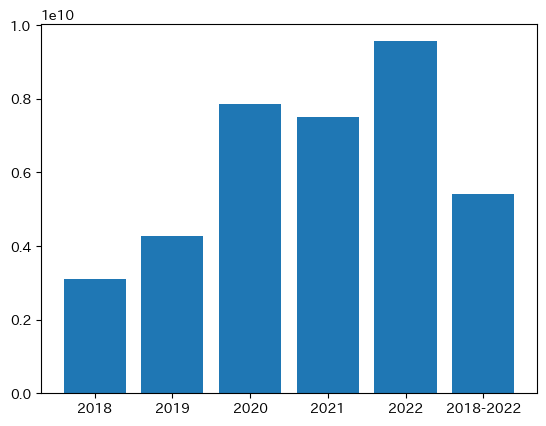

In [36]:
years = np.array(years,dtype='str')
plt.bar(years,intra_total_mean)
plt.subplot(years,percent_list)
plt.show()